## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../../ssd_data/combined_by_diskmodel/combined_MA2_preprocessed.csv',index_col=False)

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by='ds')
data

disk_id        ds    n_5  r_5      r_9  r_12  n_170  n_171  r_171  \
0          100061  20190101  100.0  0.0  38952.0  12.0  100.0  100.0    0.0   
69147      100526  20190101  100.0  0.0  22095.0  33.0  100.0  100.0    0.0   
69146      100498  20190101  100.0  0.0  30219.0  14.0  100.0  100.0    0.0   
69145      100481  20190101  100.0  0.0  30541.0  16.0  100.0  100.0    0.0   
69144      100077  20190101  100.0  0.0  29271.0  15.0  100.0  100.0    0.0   
...           ...       ...    ...  ...      ...   ...    ...    ...    ...   
17160543    99911  20190630  100.0  0.0  38400.0  22.0  100.0  100.0    0.0   
17160542    99916  20190630  100.0  0.0  38400.0  22.0  100.0  100.0    0.0   
17160541    99928  20190630  100.0  0.0  32832.0  18.0  100.0  100.0    0.0   
17160539    90447  20190630  100.0  0.0  34820.0  23.0  100.0  100.0    0.0   
17217446    99983  20190630  100.0  0.0  41046.0  16.0  100.0  100.0    0.0   

          n_172  ...  r_194  r_197  r_199  n_233       r_241       r_242  \
0         100.0  ...   22.0    0.0    0.0   81.0   6776719.0    330779.0   
69147     100.0  ...   25.0    0.0  599.0   98.0    192881.0   3329560.0   
69146     100.0  ...   28.0    0.0    0.0   98.0   1229015.0    226607.0   
69145     100.0  ...   26.0    0.0    0.0   89.0   3690766.0    641372.0   
69144     100.0  ...   27.0    0.0    0.0   86.0   5106285.0    199099.0   
...         ...  ...    ...    ...    ...    ...         ...         ...   
17160543  100.0  ...   27.0    0.0    2.0   84.0   7858993.0   5498756.0   
17160542  100.0  ...   28.0    0.0    0.0   83.0   7840623.0   5499841.0   
17160541  100.0  ...   27.0    0.0    0.0   69.0  13443203.0    595462.0   
17160539  100.0  ...   25.0    0.0    0.0   35.0  15457115.0  34958903.0   
17217446  100.0  ...   26.0    0.0    0.0   91.0   2746165.0   8689696.0   

          n_175         r_175  n_232  label  
0         100.0  9.965843e+11  100.0      0  
69147     100.0  5.503842e+11  100.0      0  
69146     100.0  7.731972e+11  100.0      0  
69145     100.0  7.777782e+11  100.0      0  
69144     100.0  7.391627e+11  100.0      0  
...         ...           ...    ...    ...  
17160543  100.0  9.796515e+11  100.0      0  
17160542  100.0  9.796523e+11  100.0      0  
17160541  100.0  8.333342e+11  100.0      0  
17160539  100.0  8.810496e+11  100.0      0  
17217446  100.0  1.043835e+12  100.0      0  

[17217447 rows x 29 columns]

In [3]:
def remove_single_value_columns(df):
    single_value_cols = []
    for col in df.columns:
        unique_values = df[col].nunique()
        if unique_values == 1:
            single_value_cols.append(col)
    print(single_value_cols)
    df_filtered = df.drop(single_value_cols, axis=1)
    return df_filtered

filtered_data = remove_single_value_columns(data)
filtered_data

['model', 'n_1', 'n_9', 'n_12', 'r_173', 'n_187', 'n_194', 'n_195', 'n_199']


disk_id        ds           r_1   n_5  r_5      r_9  r_12  n_171  \
0          10045  20190101  4.294967e+09  97.0  0.0  38288.0   NaN    NaN   
19059       3614  20190101  4.294967e+09  96.0  0.0  44475.0  26.0  100.0   
19058      36107  20190101  4.294967e+09  97.0  0.0  40372.0  37.0  100.0   
19057      36104  20190101  4.294967e+09  98.0  0.0  40369.0  37.0  100.0   
19056        361  20190101  3.276881e+09  95.0  2.0  46646.0  39.0  100.0   
...          ...       ...           ...   ...  ...      ...   ...    ...   
4728266    17784  20190630  4.294967e+09  97.0  0.0  42460.0   NaN    NaN   
4728265    17781  20190630  4.294967e+09  97.0  0.0  42460.0   NaN    NaN   
4728264    17715  20190630  4.294967e+09  96.0  0.0  40284.0  52.0  100.0   
4728273    17929  20190630  4.294967e+09  97.0  1.0  49490.0  47.0  100.0   
4744314     9974  20190630  4.294967e+09  96.0  0.0  46623.0  44.0  100.0   

         r_171  n_172  ...  r_194         r_195  n_196  r_196  r_197  r_198  \
0          NaN    NaN  ...   12.0           NaN  100.0    0.0    NaN    NaN   
19059      0.0  100.0  ...   11.0  1.120414e+09  100.0    0.0    0.0    0.0   
19058      0.0  100.0  ...   16.0  8.552900e+05  100.0    0.0    0.0    0.0   
19057      0.0  100.0  ...   16.0  1.044777e+06  100.0    0.0    0.0    0.0   
19056      1.0  100.0  ...   16.0  1.091491e+06   99.0    2.0    0.0    0.0   
...        ...    ...  ...    ...           ...    ...    ...    ...    ...   
4728266    NaN    NaN  ...   16.0           NaN  100.0    0.0    NaN    NaN   
4728265    NaN    NaN  ...   15.0           NaN  100.0    0.0    NaN    NaN   
4728264    0.0  100.0  ...   14.0  8.232852e+06  100.0    0.0    0.0    0.0   
4728273    0.0  100.0  ...   14.0  4.142201e+08   99.0    1.0    0.0    0.0   
4744314    0.0  100.0  ...   14.0  3.944694e+08  100.0    0.0    0.0    0.0   

         r_199  n_175         r_175  label  
0          NaN  100.0  9.752124e+11      0  
19059      0.0  100.0  1.125649e+12      0  
19058      0.0  100.0  1.014122e+12      0  
19057      0.0  100.0  1.014122e+12      0  
19056      0.0  100.0  1.181125e+12      0  
...        ...    ...           ...    ...  
4728266    NaN  100.0  1.074284e+12      0  
4728265    NaN  100.0  1.074284e+12      0  
4728264    0.0  100.0  1.018248e+12      0  
4728273    0.0  100.0  1.241550e+12      0  
4744314    0.0  100.0  1.164486e+12      0  

[4744315 rows x 31 columns]

NaN갑과 특정 숫자 하나만 가지는 feature가 존재하는데, 제거하지 않고 일단 남겨놓고 진행

## EDA

In [2]:
print(data.shape)
nan_stats = data.isnull().sum().sort_values(ascending = False)/data.shape[0]
nan_stats

(17217447, 29)


r_183      0.000056
r_184      0.000055
n_184      0.000055
r_197      0.000055
n_175      0.000055
r_175      0.000055
r_199      0.000055
n_233      0.000055
r_174      0.000055
r_187      0.000055
n_172      0.000054
r_172      0.000054
r_190      0.000054
n_190      0.000054
r_241      0.000054
r_5        0.000054
n_5        0.000054
r_9        0.000054
r_12       0.000054
r_171      0.000054
n_171      0.000054
n_232      0.000054
r_192      0.000054
n_170      0.000054
r_194      0.000054
r_242      0.000053
disk_id    0.000000
ds         0.000000
label      0.000000
dtype: float64

In [4]:
features_data = data.drop(columns=['disk_id','ds'])
features_info=features_data.describe()

In [5]:
features_info.iloc[:,:14]

n_5           r_5           r_9          r_12         n_170  \
count  1.721651e+07  1.721651e+07  1.721652e+07  1.721652e+07  1.721652e+07   
mean   9.983424e+01  1.155041e+01  3.379940e+04  2.607512e+01  9.982327e+01   
std    2.019501e+00  1.523247e+02  5.224308e+03  2.969848e+02  1.438746e+00   
min    4.700000e+01  0.000000e+00  1.200000e+01  2.000000e+00  6.200000e+01   
25%    1.000000e+02  0.000000e+00  3.057500e+04  1.300000e+01  1.000000e+02   
50%    1.000000e+02  0.000000e+00  3.270800e+04  1.700000e+01  1.000000e+02   
75%    1.000000e+02  0.000000e+00  3.883100e+04  2.200000e+01  1.000000e+02   
max    1.000000e+02  4.080000e+03  4.787900e+04  5.120900e+04  1.000000e+02   

              n_171         r_171         n_172         r_172         r_174  \
count  1.721652e+07  1.721652e+07  1.721651e+07  1.721651e+07  1.721651e+07   
mean   9.996688e+01  6.371059e+00  9.999872e+01  8.628793e-02  2.081100e+01   
std    1.549938e+00  4.323355e+02  1.131808e-01  7.087255e+00  2.931907e+02   
min    1.000000e+00  0.000000e+00  6.600000e+01  0.000000e+00  1.000000e+00   
25%    1.000000e+02  0.000000e+00  1.000000e+02  0.000000e+00  8.000000e+00   
50%    1.000000e+02  0.000000e+00  1.000000e+02  0.000000e+00  1.200000e+01   
75%    1.000000e+02  0.000000e+00  1.000000e+02  0.000000e+00  1.800000e+01   
max    1.000000e+02  4.642400e+04  1.000000e+02  2.044000e+03  5.120600e+04   

              r_183         n_184         r_184         r_187  
count  1.721649e+07  1.721649e+07  1.721649e+07  1.721651e+07  
mean   8.271513e+00  9.999985e+01  1.518311e-04  2.166525e-04  
std    8.287988e+02  4.250021e-02  4.250021e-02  7.185012e-02  
min    0.000000e+00  8.600000e+01  0.000000e+00  0.000000e+00  
25%    0.000000e+00  1.000000e+02  0.000000e+00  0.000000e+00  
50%    0.000000e+00  1.000000e+02  0.000000e+00  0.000000e+00  
75%    0.000000e+00  1.000000e+02  0.000000e+00  0.000000e+00  
max    1.558160e+05  1.000000e+02  1.400000e+01  2.600000e+01

In [6]:
features_info.iloc[:,14:29]

n_190         r_190         r_192         r_194         r_197  \
count  1.721651e+07  1.721651e+07  1.721652e+07  1.721652e+07  1.721650e+07   
mean   8.498780e+01  1.501232e+01  2.081105e+01  2.599804e+01  1.210060e-02   
std    2.589840e+00  2.601365e+00  2.931906e+02  2.637101e+00  8.546232e-01   
min    1.000000e+00  1.000000e+00  1.000000e+00  8.000000e+00  0.000000e+00   
25%    8.400000e+01  1.300000e+01  8.000000e+00  2.400000e+01  0.000000e+00   
50%    8.500000e+01  1.500000e+01  1.200000e+01  2.600000e+01  0.000000e+00   
75%    8.700000e+01  1.600000e+01  1.800000e+01  2.700000e+01  0.000000e+00   
max    9.900000e+01  1.280000e+02  5.120600e+04  1.390000e+02  1.701000e+03   

              r_199         n_233         r_241         r_242         n_175  \
count  1.721650e+07  1.721651e+07  1.721651e+07  1.721654e+07  1.721650e+07   
mean   6.123932e+02  8.423975e+01  5.846344e+06  6.090089e+06  9.985840e+01   
std    2.545513e+04  1.626914e+01  6.410354e+06  9.502858e+06  3.741452e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    0.000000e+00  7.900000e+01  1.270393e+06  3.546000e+05  1.000000e+02   
50%    0.000000e+00  8.900000e+01  4.184090e+06  1.983126e+06  1.000000e+02   
75%    0.000000e+00  9.600000e+01  8.105811e+06  7.798020e+06  1.000000e+02   
max    5.840350e+06  1.000000e+02  8.354861e+07  2.244157e+08  1.000000e+02   

              r_175         n_232         label  
count  1.721650e+07  1.721652e+07  1.721745e+07  
mean   8.611231e+11  9.981216e+01  1.974741e-06  
std    1.332485e+11  1.585320e+00  1.405253e-03  
min    4.341367e+09  5.800000e+01  0.000000e+00  
25%    7.778173e+11  1.000000e+02  0.000000e+00  
50%    8.335435e+11  1.000000e+02  0.000000e+00  
75%    9.880599e+11  1.000000e+02  0.000000e+00  
max    1.215961e+12  1.000000e+02  1.000000e+00

<AxesSubplot:>

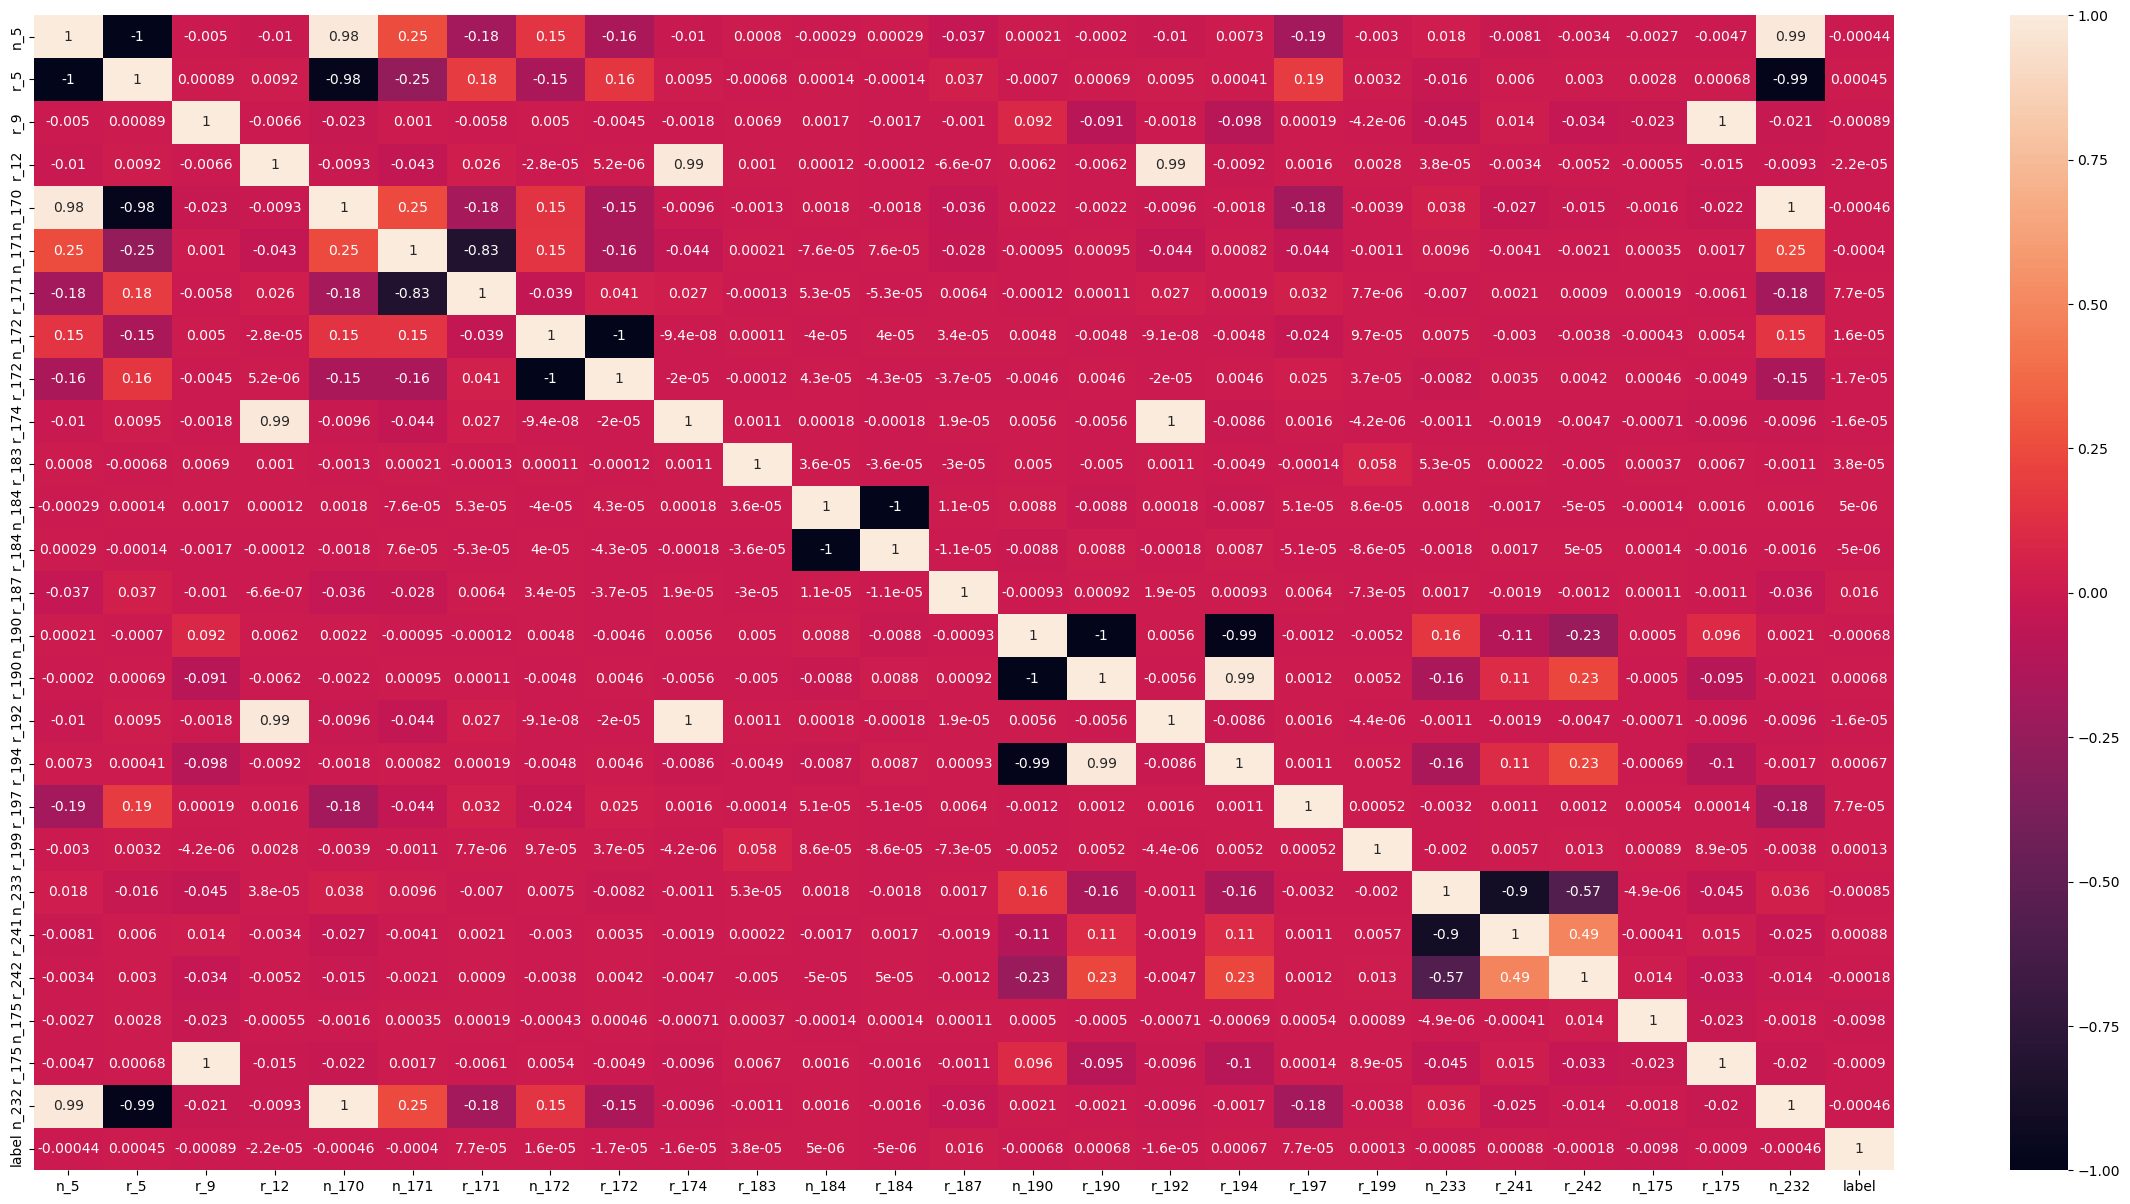

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt # seaborn figure 크기 조절을 위해서
corr = features_data.corr()
plt.figure(figsize=(30, 15)) 
sns.heatmap(corr, annot=True)

In [8]:
# 상관계수의 절대값이 0.4 이상인 셀만 선택
corr_np = np.abs(corr.values)
mask = corr_np > 0.4

# 선택한 셀의 행렬에서 대각선을 제거(자기 자신과의 상관계수는 항상 1)
mask[np.triu_indices_from(mask, k=1)] = False

# 마스크 적용
high_corr = corr_np[mask]

# 해당하는 feature 쌍 print
high_corr_pairs = []
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j] and i != j:  # 추가된 부분: i와 j가 같지 않을 때만 추가
            high_corr_pairs.append((corr.columns[i], corr.columns[j]))

print(high_corr_pairs)

[('r_5', 'n_5'), ('n_170', 'n_5'), ('n_170', 'r_5'), ('r_171', 'n_171'), ('r_172', 'n_172'), ('r_174', 'r_12'), ('r_184', 'n_184'), ('r_190', 'n_190'), ('r_192', 'r_12'), ('r_192', 'r_174'), ('r_194', 'n_190'), ('r_194', 'r_190'), ('r_241', 'n_233'), ('r_242', 'n_233'), ('r_242', 'r_241'), ('r_175', 'r_9'), ('n_232', 'n_5'), ('n_232', 'r_5'), ('n_232', 'n_170')]


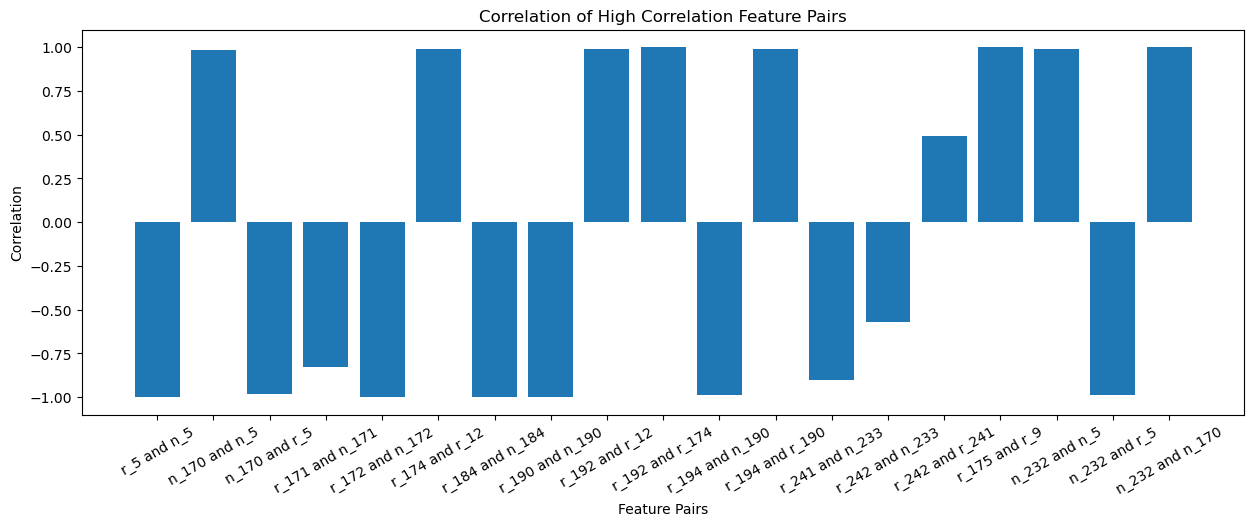

In [9]:
import matplotlib.pyplot as plt

# 상관계수 값 가져오기
high_corr_values = [corr.loc[pair] for pair in high_corr_pairs]

# 특성 쌍 이름 가져오기
pair_names = [f"{pair[0]} and {pair[1]}" for pair in high_corr_pairs]

# bar plot 그리기
plt.figure(figsize=(15, 5))
plt.bar(pair_names, high_corr_values)
plt.xlabel('Feature Pairs')
plt.ylabel('Correlation')
plt.title('Correlation of High Correlation Feature Pairs')
plt.xticks(rotation=30)
plt.show()

## About healthy data

#### label = 0 인 데이터 중, 랜덤으로 3개에 대해서 feature plot 그려보기

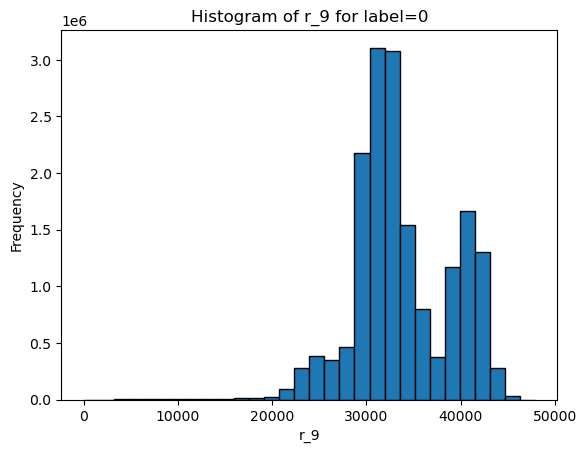

In [10]:
import matplotlib.pyplot as plt

# label이 1인 데이터의 r_9 히스토그램 그리기
plt.hist(data[data['label'] == 0]['r_9'], bins=30, edgecolor='k')

# 히스토그램 제목과 축 레이블 설정
plt.title("Histogram of r_9 for label=0")
plt.xlabel("r_9")
plt.ylabel("Frequency")

# 그래프 출력
plt.show()

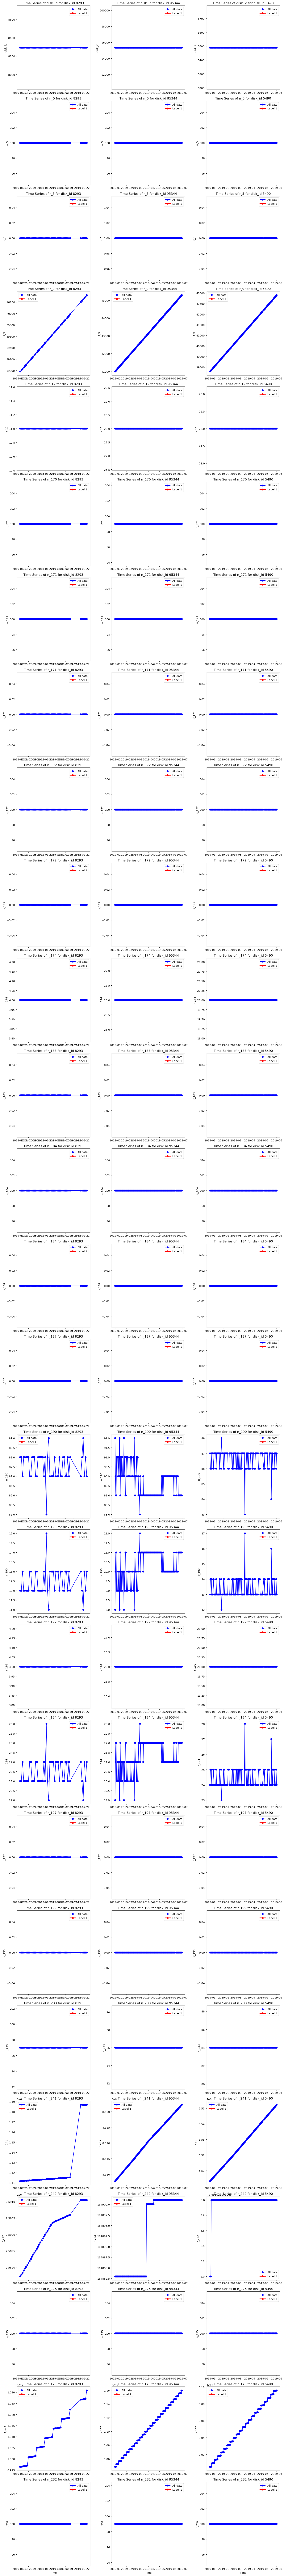

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# label=1인 disk_id 선택
disk_ids = data[data["label"]==0]['disk_id'].unique()

# disk_ids 중에서 임의로 3개 선택
selected_disk_ids = np.random.choice(disk_ids, size=3, replace=False)

# ds와 label 열을 제외한 모든 열에 대해
features = data.drop(['ds', 'label'], axis=1).columns

# 행의 수는 특징의 수, 열의 수는 disk_id의 수
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]

    # disk를 시간 순서대로 정렬
    disk = disk.sort_values('ds')

    # ds 열을 datetime으로 변환
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')

    # ds를 인덱스로 설정
    disk.set_index('ds', inplace=True)

    # label이 1인 데이터
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        # 모든 데이터 그리기
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')

        # label이 1인 데이터 빨간색으로 강조하여 그리기
        # 선의 굵기를 3으로 설정하고, 각 포인트에 대해 'o' 모양의 마커를 추가함
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')

        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

# x축 라벨 설정은 마지막 행에 대해서만 수행
for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

#### label = 0 인 데이터 중, r_9값이 작은순서대로 3개에 대해서 feature plot 그려보기

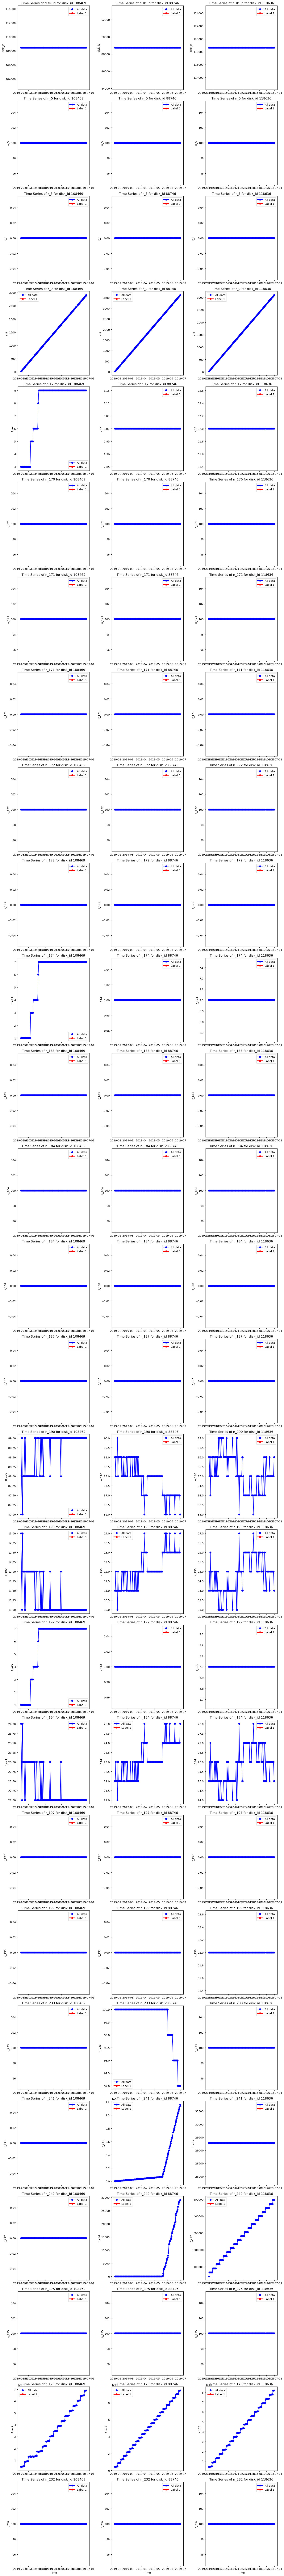

In [12]:
# label = 0인 disk_id 선택
disk_ids = data[data["label"]==0]['disk_id'].unique()

# 'r_9' 변수가 가장 작은 disk_id 선택
sorted_disk_ids = data[data['disk_id'].isin(disk_ids)].groupby('disk_id')['r_9'].min().sort_values()

# 가장 작은 'r_9' 값을 가진 3개의 disk_id 선택
selected_disk_ids = sorted_disk_ids.head(3).index

# 나머지 코드는 동일하게 실행
features = data.drop(['ds', 'label'], axis=1).columns
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]
    disk = disk.sort_values('ds')
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')
    disk.set_index('ds', inplace=True)
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')
        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

In [14]:
data[data['disk_id']==88746]

disk_id        ds    n_5  r_5     r_9  r_12  n_170  n_171  r_171  \
3039196     88746  20190130  100.0  0.0    13.0   3.0  100.0  100.0    0.0   
3160371     88746  20190131  100.0  0.0    37.0   3.0  100.0  100.0    0.0   
3261886     88746  20190201  100.0  0.0    61.0   3.0  100.0  100.0    0.0   
3307695     88746  20190202  100.0  0.0    85.0   3.0  100.0  100.0    0.0   
3425490     88746  20190203  100.0  0.0   109.0   3.0  100.0  100.0    0.0   
...           ...       ...    ...  ...     ...   ...    ...    ...    ...   
16860843    88746  20190626  100.0  0.0  3525.0   3.0  100.0  100.0    0.0   
16920476    88746  20190627  100.0  0.0  3549.0   3.0  100.0  100.0    0.0   
17005980    88746  20190628  100.0  0.0  3573.0   3.0  100.0  100.0    0.0   
17066860    88746  20190629  100.0  0.0  3597.0   3.0  100.0  100.0    0.0   
17169805    88746  20190630  100.0  0.0  3621.0   3.0  100.0  100.0    0.0   

          n_172  ...  r_194  r_197  r_199  n_233      r_241    r_242  n_175  \
3039196   100.0  ...   22.0    0.0    0.0  100.0     2317.0     39.0  100.0   
3160371   100.0  ...   22.0    0.0    0.0  100.0     2868.0     39.0  100.0   
3261886   100.0  ...   23.0    0.0    0.0  100.0     3388.0     39.0  100.0   
3307695   100.0  ...   22.0    0.0    0.0  100.0     3921.0     39.0  100.0   
3425490   100.0  ...   22.0    0.0    0.0  100.0     4438.0     39.0  100.0   
...         ...  ...    ...    ...    ...    ...        ...      ...    ...   
16860843  100.0  ...   24.0    0.0    0.0   97.0  1058427.0  27453.0  100.0   
16920476  100.0  ...   24.0    0.0    0.0   97.0  1083758.0  28014.0  100.0   
17005980  100.0  ...   24.0    0.0    0.0   97.0  1109101.0  28486.0  100.0   
17066860  100.0  ...   24.0    0.0    0.0   97.0  1133911.0  28866.0  100.0   
17169805  100.0  ...   25.0    0.0    0.0   97.0  1158589.0  29054.0  100.0   

                 r_175  n_232  label  
3039196   4.348576e+09  100.0      0  
3160371   4.442489e+09  100.0      0  
3261886   4.536403e+09  100.0      0  
3307695   4.630250e+09  100.0      0  
3425490   4.724163e+09  100.0      0  
...                ...    ...    ...  
16860843  9.084541e+10  100.0      0  
16920476  9.457376e+10  100.0      0  
17005980  9.466780e+10  100.0      0  
17066860  9.476185e+10  100.0      0  
17169805  9.485589e+10  100.0      0  

[151 rows x 29 columns]

데이터 값은 20190528에 처음 나타나고, r_9값도 이때 0부터 시작

## About Failed data

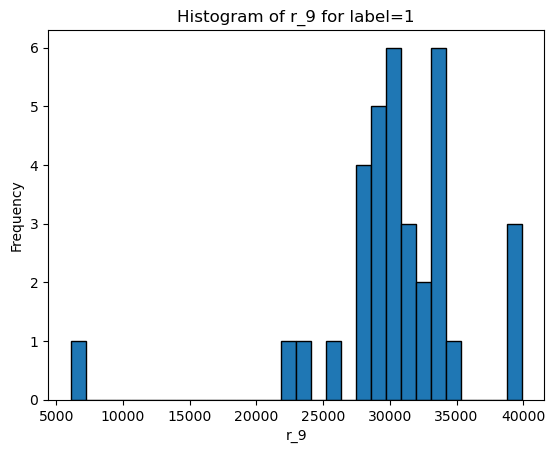

In [15]:
import matplotlib.pyplot as plt

# label이 1인 데이터의 r_9 히스토그램 그리기
plt.hist(data[data['label'] == 1]['r_9'], bins=30, edgecolor='k')

# 히스토그램 제목과 축 레이블 설정
plt.title("Histogram of r_9 for label=1")
plt.xlabel("r_9")
plt.ylabel("Frequency")

# 그래프 출력
plt.show()

MB2에서는 초기 고장은 잘 안나는듯하다.

#### label = 1 인 데이터 중, 랜덤으로 3개에 대해서 feature plot 그려보기

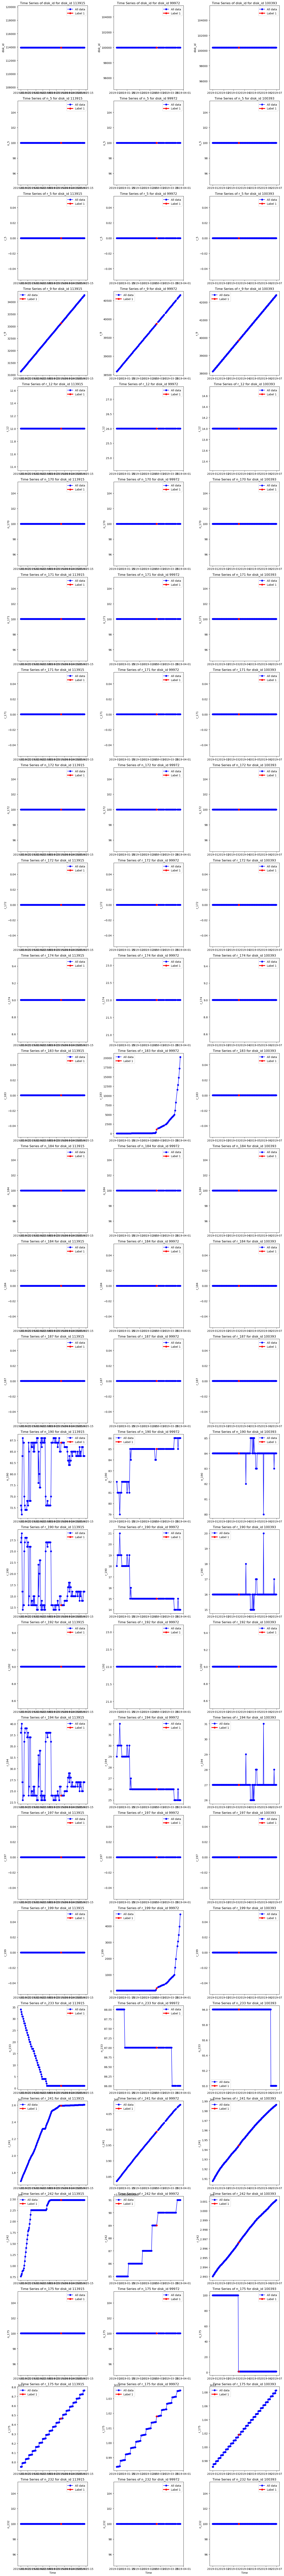

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# label=1인 disk_id 선택
disk_ids = data[data["label"]==1]['disk_id'].unique()

# disk_ids 중에서 임의로 3개 선택
selected_disk_ids = np.random.choice(disk_ids, size=3, replace=False)

# ds와 label 열을 제외한 모든 열에 대해
features = data.drop(['ds', 'label'], axis=1).columns

# 행의 수는 특징의 수, 열의 수는 disk_id의 수
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]

    # disk를 시간 순서대로 정렬
    disk = disk.sort_values('ds')

    # ds 열을 datetime으로 변환
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')

    # ds를 인덱스로 설정
    disk.set_index('ds', inplace=True)

    # label이 1인 데이터
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        # 모든 데이터 그리기
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')

        # label이 1인 데이터 빨간색으로 강조하여 그리기
        # 선의 굵기를 3으로 설정하고, 각 포인트에 대해 'o' 모양의 마커를 추가함
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')

        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

# x축 라벨 설정은 마지막 행에 대해서만 수행
for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

### label = 1 인 데이터 중, r_9값이 작은 순서대로 3개 feature plot 그려보기

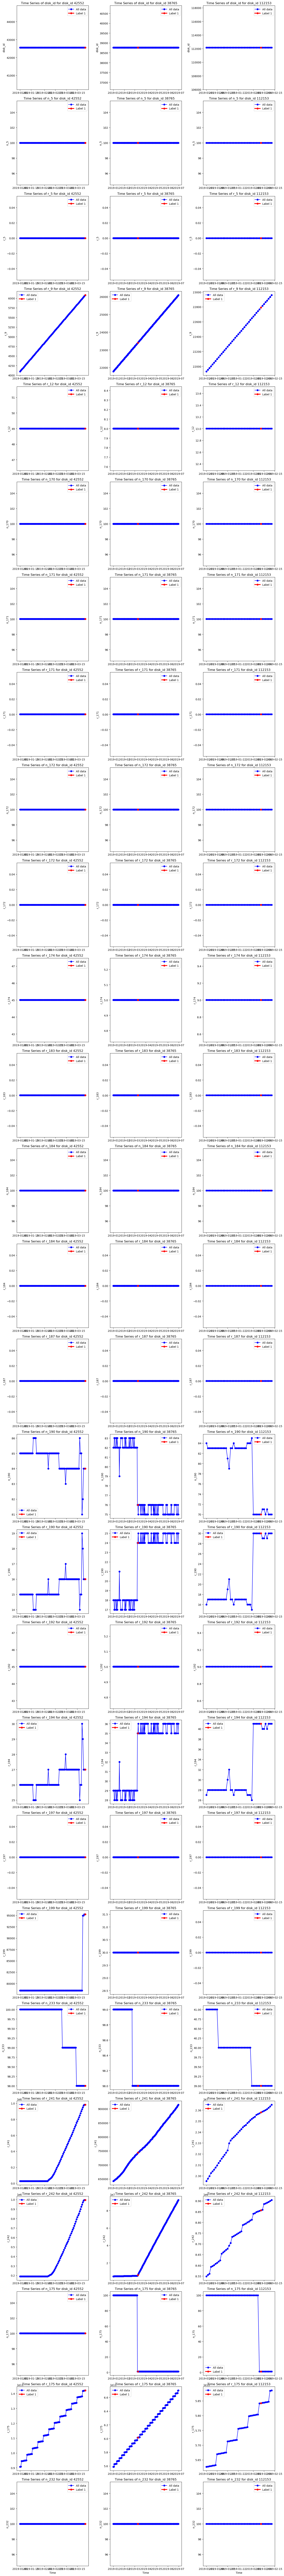

In [17]:
# label=1인 disk_id 선택
disk_ids = data[data["label"]==1]['disk_id'].unique()

# 'r_9' 변수가 가장 작은 disk_id 선택
sorted_disk_ids = data[data['disk_id'].isin(disk_ids)].groupby('disk_id')['r_9'].min().sort_values()

# 가장 작은 'r_9' 값을 가진 3개의 disk_id 선택
selected_disk_ids = sorted_disk_ids.head(3).index

# 나머지 코드는 동일하게 실행
features = data.drop(['ds', 'label'], axis=1).columns
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]
    disk = disk.sort_values('ds')
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')
    disk.set_index('ds', inplace=True)
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')
        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

## healthy VS failed 각 feature별 히스토그램

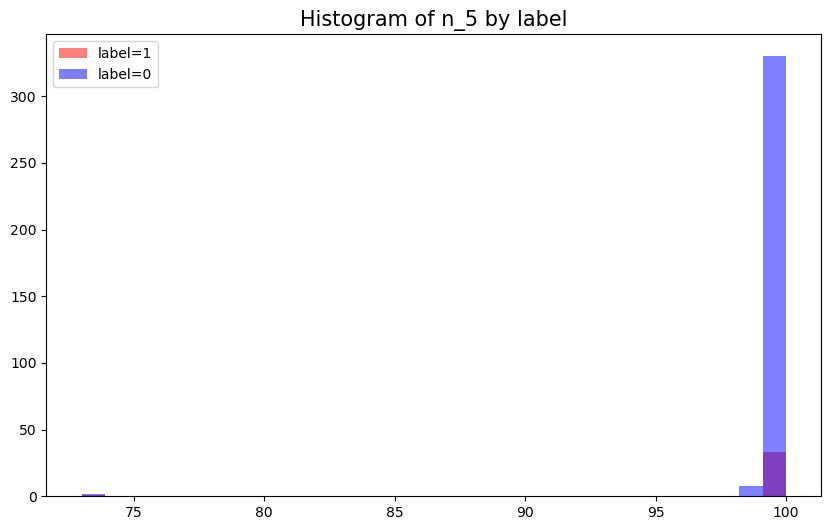

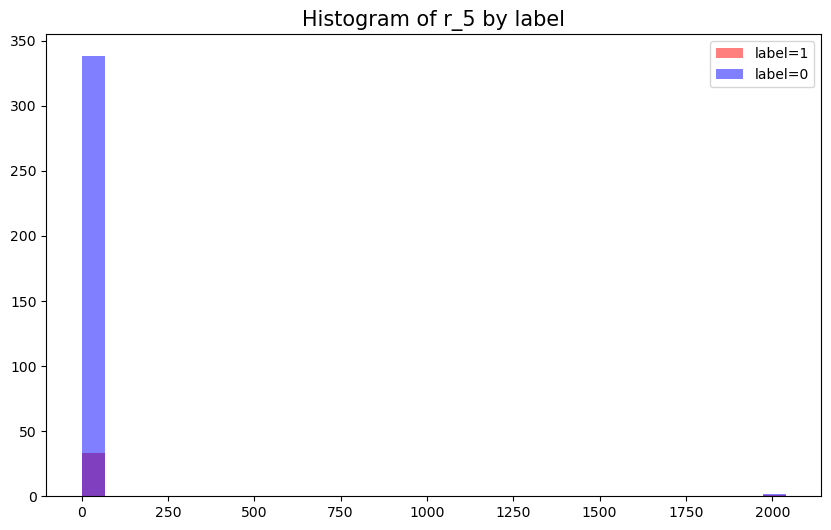

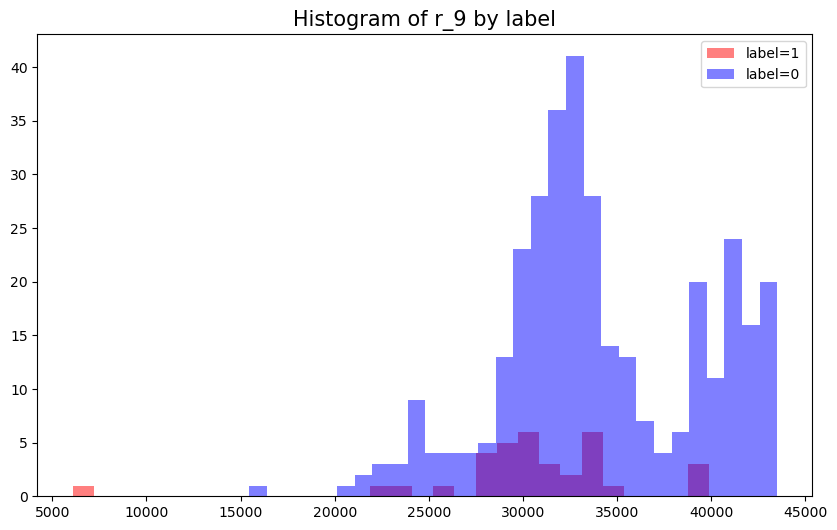

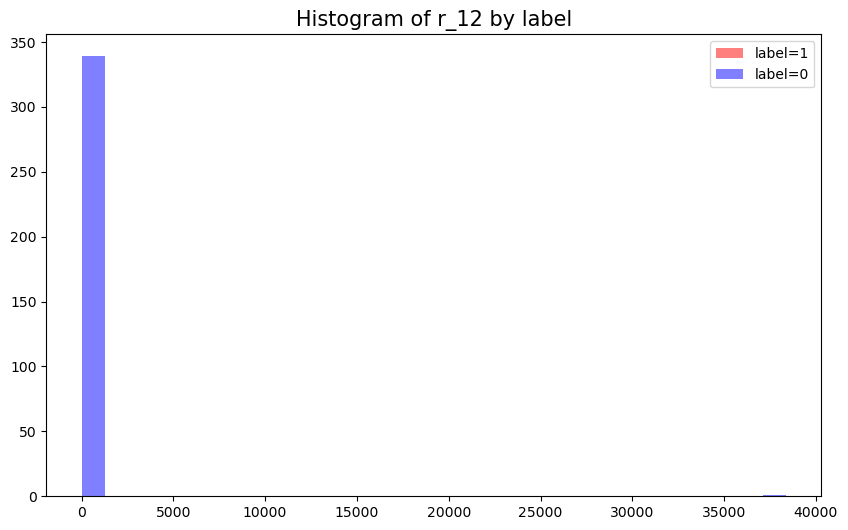

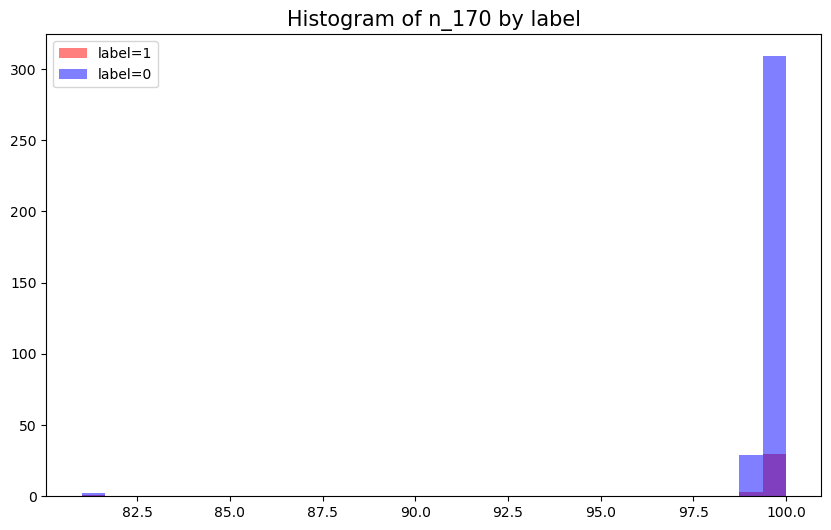

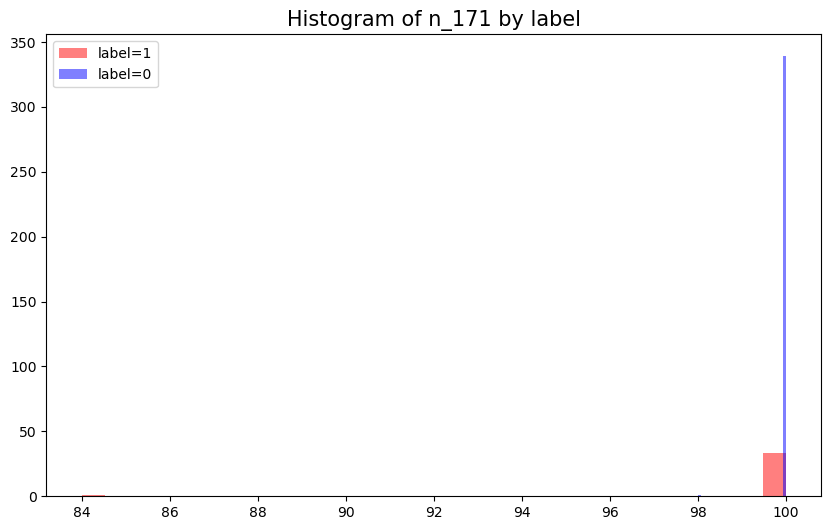

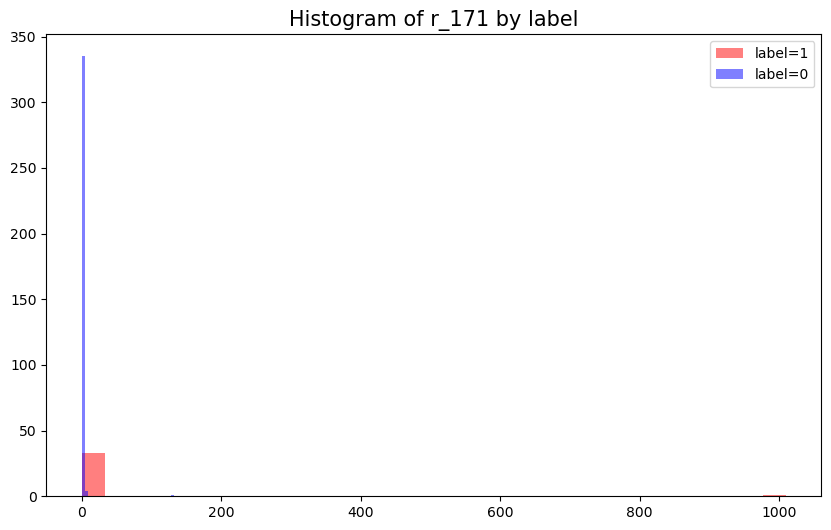

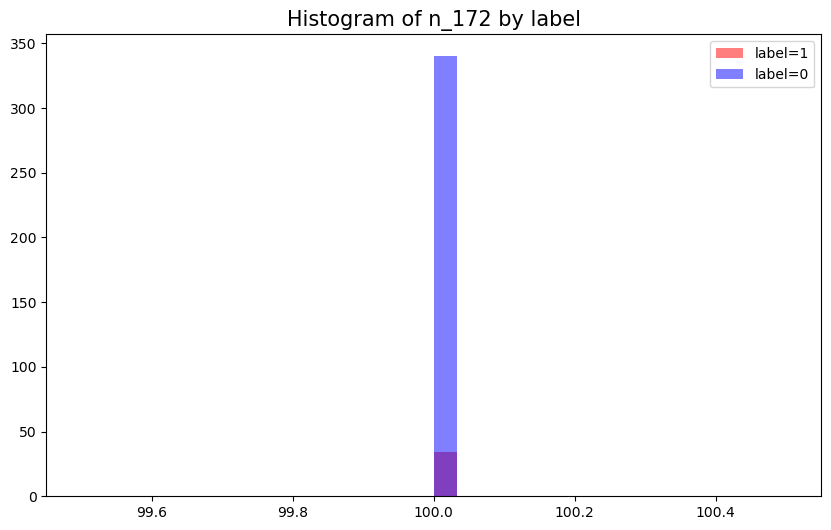

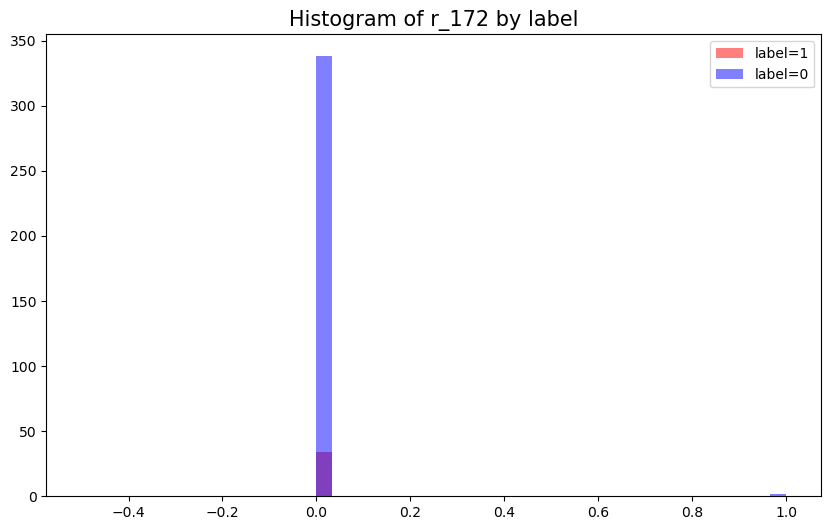

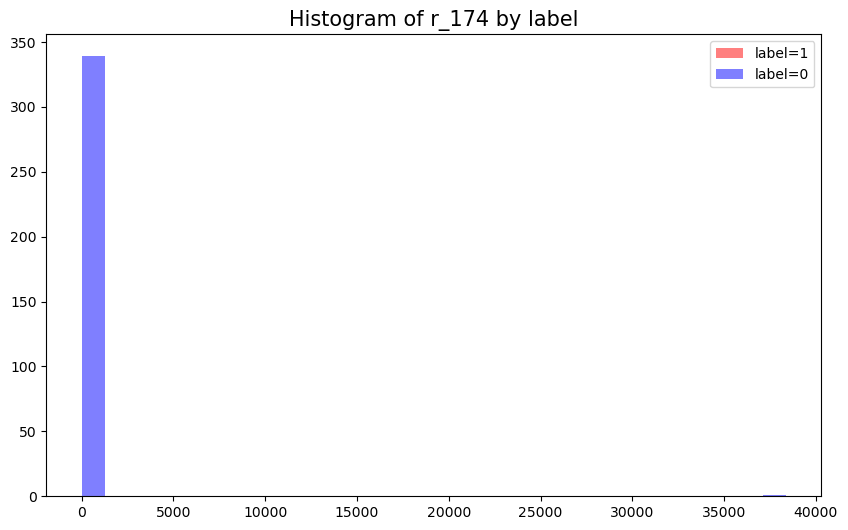

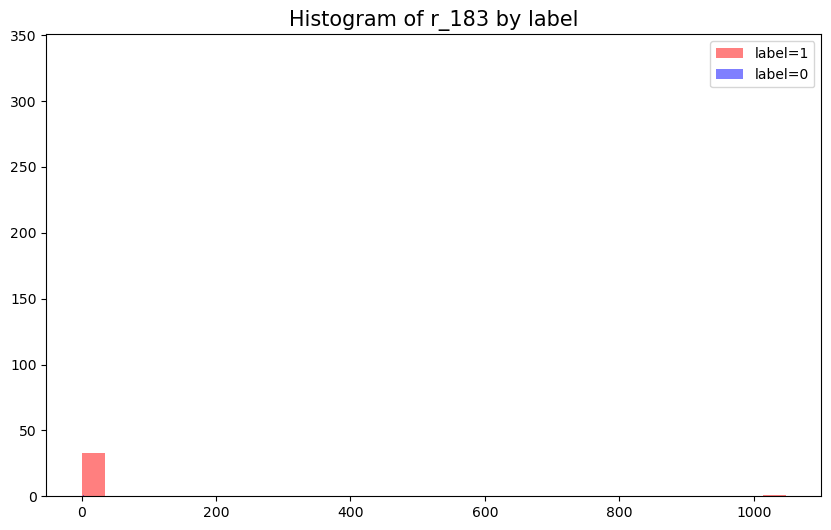

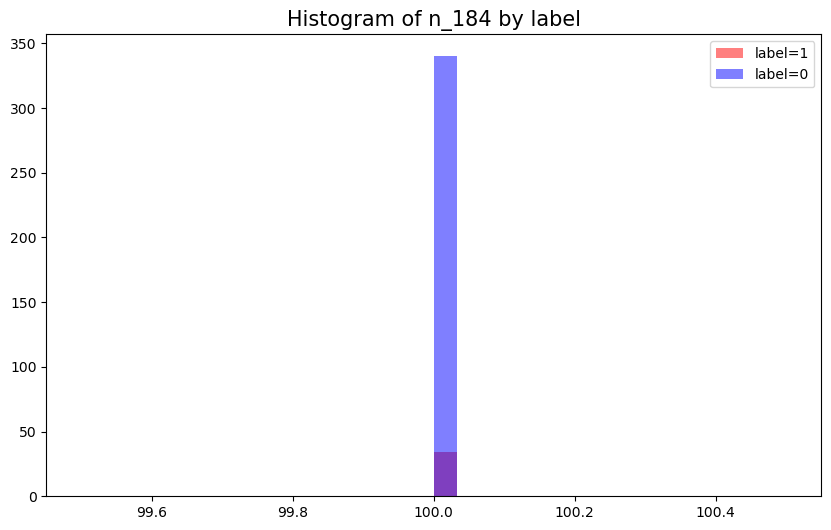

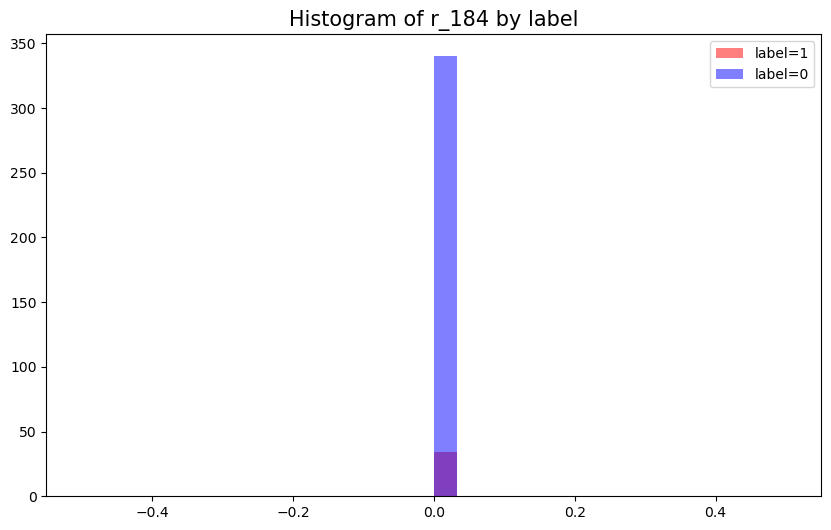

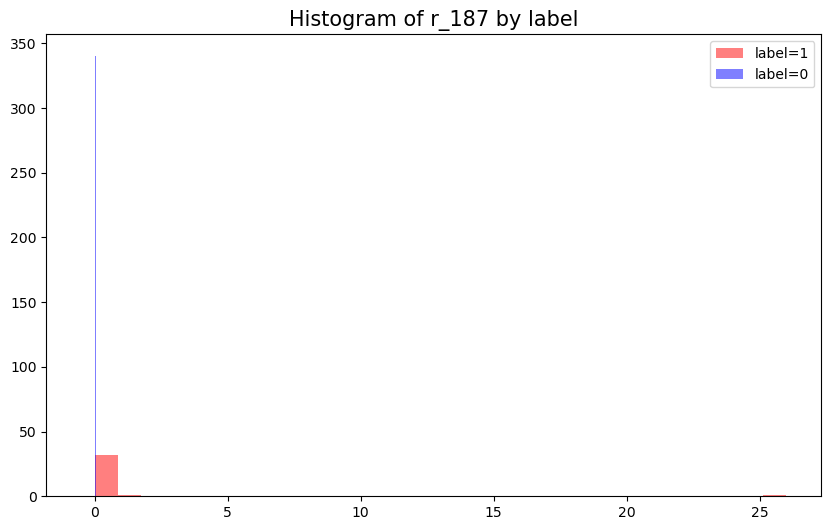

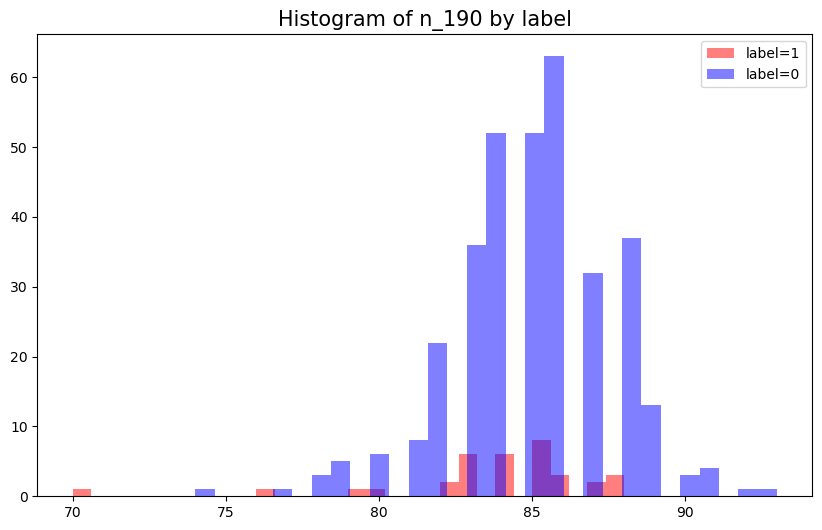

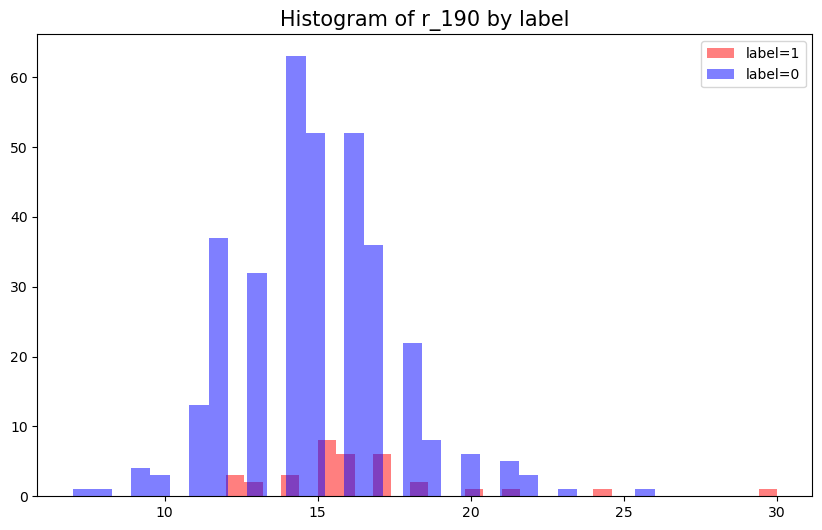

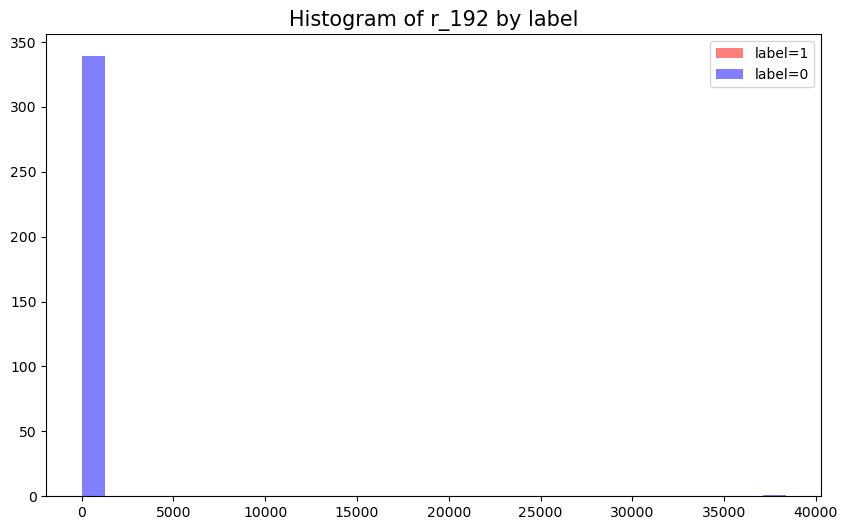

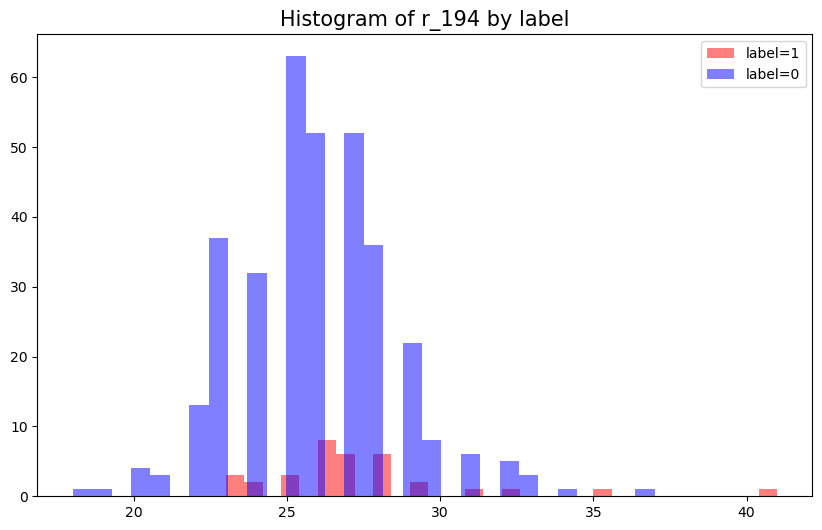

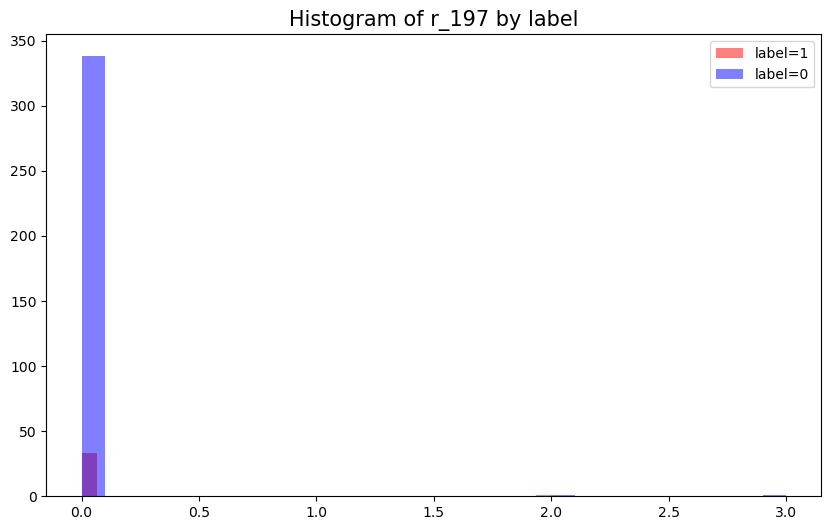

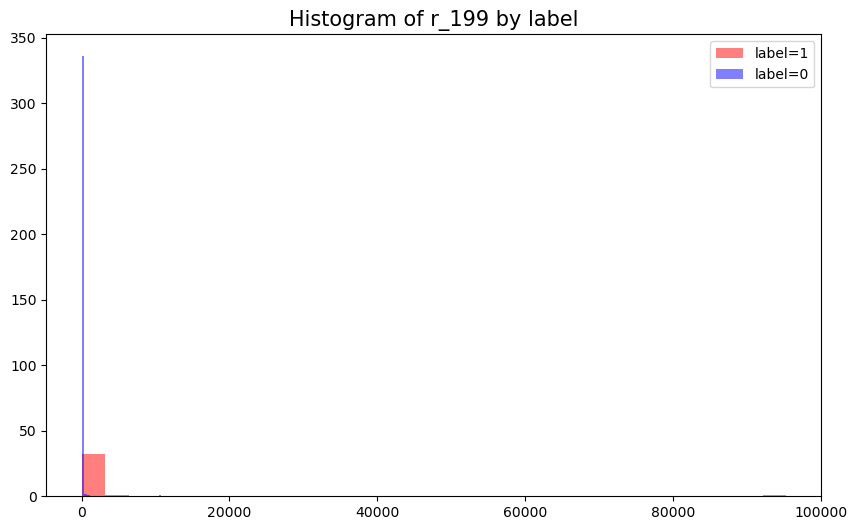

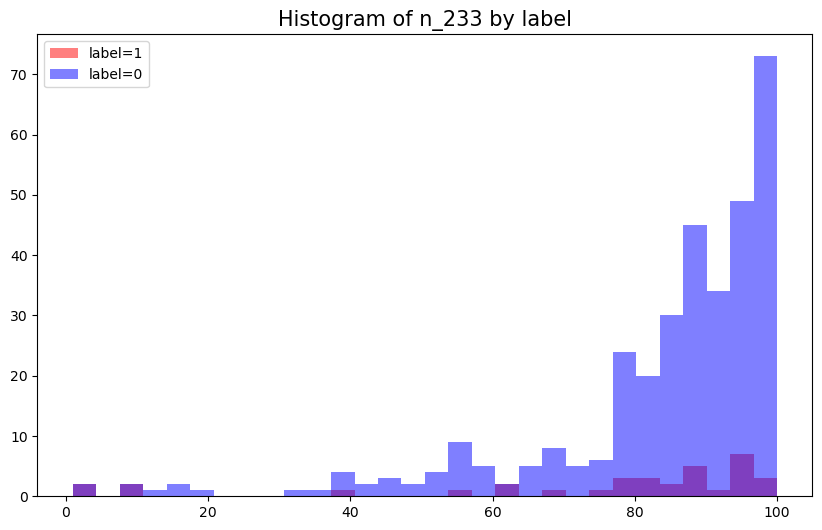

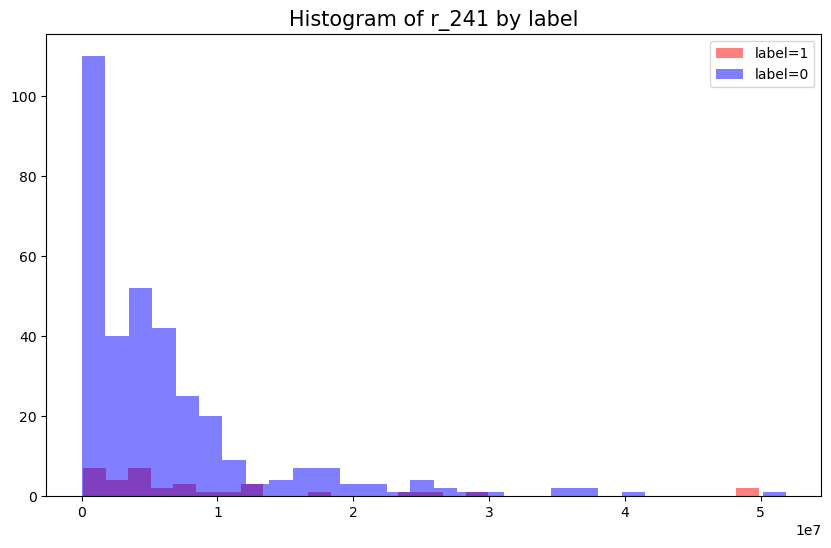

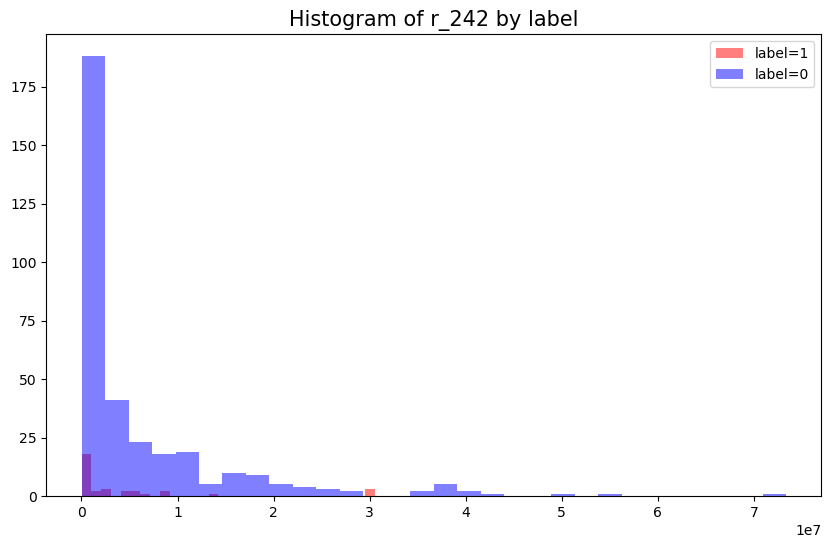

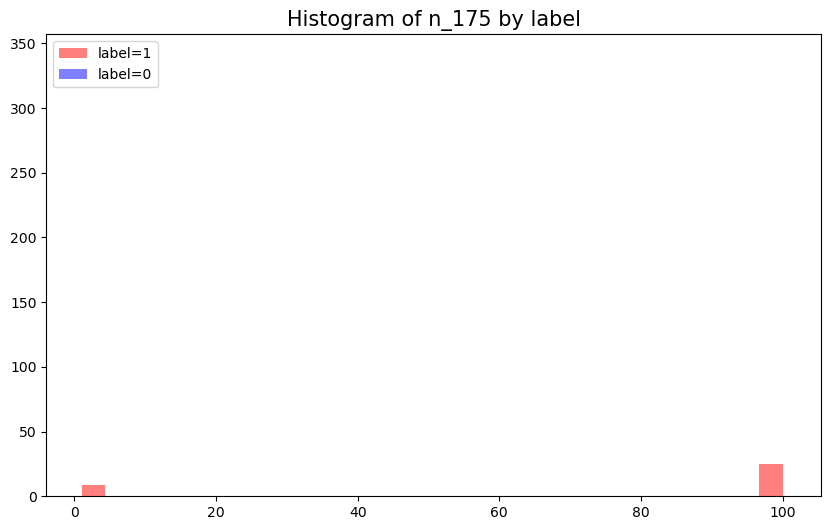

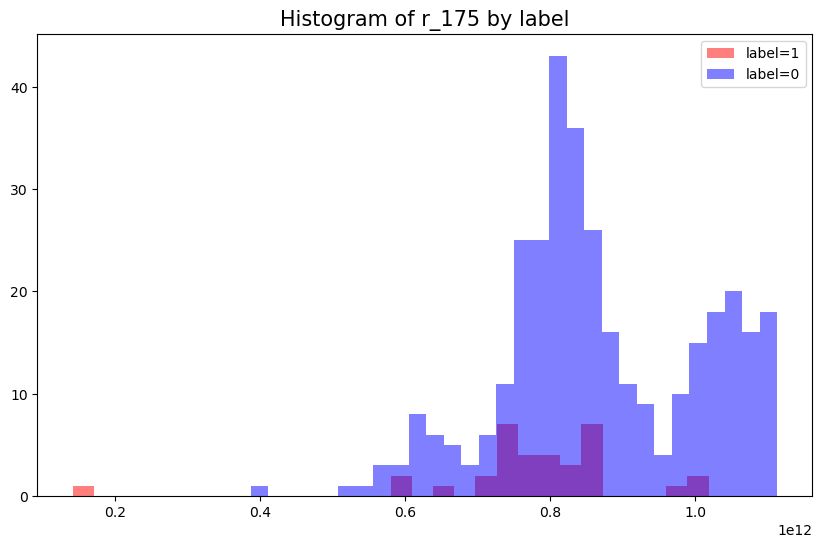

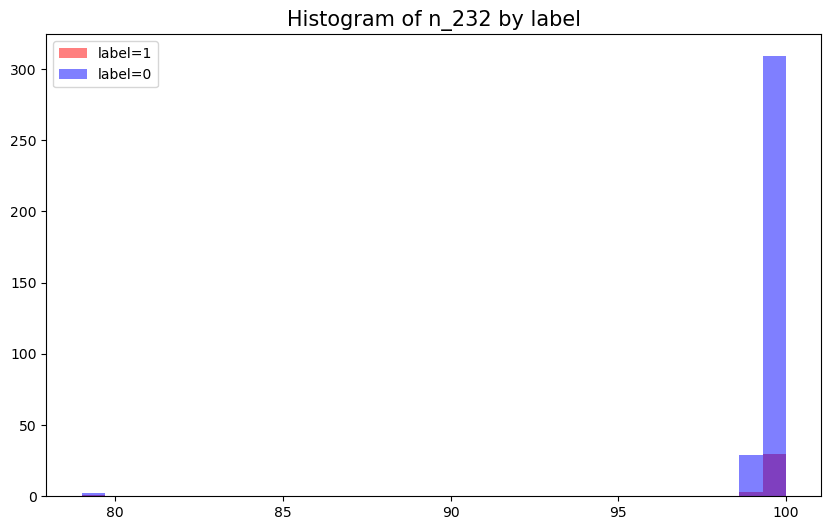

In [18]:
import numpy as np

# 'label' 컬럼을 제외한 피처들만 선택합니다.
features = [col for col in features_data.columns if col != 'label']

# 라벨 0과 1에 대해 같은 수의 샘플을 무작위로 선택합니다.
# 여기서는 라벨 1의 데이터 수를 기준으로 합니다.
n_samples = features_data[features_data['label'] == 1].shape[0]
label0_data = features_data[features_data['label'] == 0].sample(n_samples*10)
label1_data = features_data[features_data['label'] == 1]

for feature in features:
    plt.figure(figsize=(10, 6))
    
    # label=1인 데이터의 히스토그램 그리기 
    plt.hist(label1_data[feature].dropna(), color='r', alpha=0.5, bins=30)
    
    # label=0인 데이터의 히스토그램 그리기 
    plt.hist(label0_data[feature].dropna(), color='b', alpha=0.5, bins=30)
    
    plt.title('Histogram of ' + feature + ' by label', fontsize=15)
    plt.legend(['label=1', 'label=0'])
    plt.show()